In [1]:
from utils import *

# Clasificarea imaginilor cu si fara filtru sepia - RNAC

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

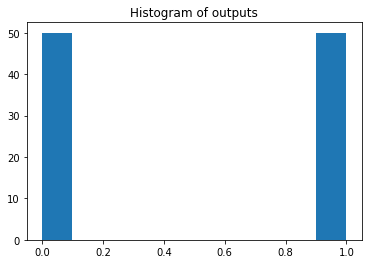

In [2]:
# creeaza un input de 100 de imagini, din care 50 au filtrul sepia
inputs, real_outputs = load_sepia()
labeled_outputs = ['sepia' if i == 1 else 'normal' for i in real_outputs]

# afiseaza o histograma a distributiei outputurilor
plot_data_histograms(real_outputs, 'outputs')

### Pasul 2 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [3]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, real_outputs, 0.8)

# normalizarea datelor
train_inputs = [el / 255.0 for el in train_inputs]
validation_inputs = [el / 255.0 for el in validation_inputs]
print(train_inputs[0])

[[[0.3372549  0.30196078 0.23529412]
  [0.4        0.35294118 0.2745098 ]
  [0.24313725 0.21568627 0.16862745]
  ...
  [0.20784314 0.18431373 0.14509804]
  [0.15686275 0.1372549  0.10588235]
  [0.14117647 0.1254902  0.09803922]]

 [[0.42352941 0.37647059 0.29019608]
  [0.43921569 0.38823529 0.30196078]
  [0.2745098  0.24313725 0.18823529]
  ...
  [0.25490196 0.22745098 0.17647059]
  [0.16078431 0.14509804 0.10980392]
  [0.20392157 0.18039216 0.14117647]]

 [[0.41568627 0.36862745 0.28627451]
  [0.38823529 0.34509804 0.27058824]
  [0.3254902  0.29019608 0.22745098]
  ...
  [0.26666667 0.23921569 0.18431373]
  [0.20392157 0.18431373 0.14117647]
  [0.16862745 0.14901961 0.11764706]]

 ...

 [[0.91764706 0.81568627 0.63529412]
  [0.90196078 0.80392157 0.62352941]
  [0.87843137 0.78431373 0.61176471]
  ...
  [0.18823529 0.16470588 0.12941176]
  [0.38039216 0.3372549  0.2627451 ]
  [0.04313725 0.03921569 0.03137255]]

 [[0.92156863 0.82352941 0.63921569]
  [0.91372549 0.81568627 0.63529412]


### Pasul 3 - Invatare model

In [4]:
from keras.optimizer_v2.rmsprop import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

classifier = Sequential()
classifier.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(96, 96, 3)))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(32, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Flatten())
classifier.add(layers.Dense(512, activation='relu'))
classifier.add(layers.Dense(1, activation='sigmoid'))
classifier.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)
classifier.fit(train_inputs, train_outputs, epochs=10, steps_per_epoch=8, verbose=0)

### Pasul 4 - Testarea datelor de validare

In [5]:
validation_inputs = np.array(validation_inputs)
predicted_validation_outputs = (classifier.predict(validation_inputs) > 0.5).astype('int32')

### Pasul 5 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy - by tool: 0.95


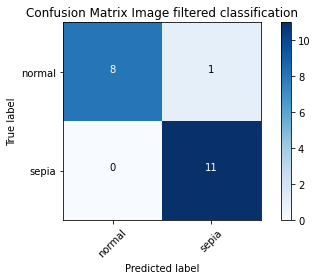

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, predicted_validation_outputs)
print('Accuracy - by tool:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, predicted_validation_outputs)
plot_confusion_matrix(cm, ['normal', 'sepia'], 'Image filtered classification')